TPU 사용 on Colab  
출처: https://colab.research.google.com/github/pytorch/xla/blob/master/contrib/colab/getting-started.ipynb#scrollTo=4b8RfPPk4VIX

Pytorch/XLA 설치

In [4]:
!pip install cloud-tpu-client==0.10 torch==1.12.0 https://storage.googleapis.com/tpu-pytorch/wheels/colab/torch_xla-1.12-cp37-cp37m-linux_x86_64.whl

# 설치후 런타임 재시작

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 187.4 MB 26 kB/s 
     |████████████████████████████████| 776.3 MB 14 kB/s 
     |████████████████████████████████| 57 kB 4.0 MB/s 
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 1.12.11
    Uninstalling google-api-python-client-1.12.11:
      Successfully uninstalled google-api-python-client-1.12.11
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.13.1+cu113 requires torch==1.12.1, but you have torch 1.12.0 which is incompatible.
torchtext 0.13.1 requires torch==1.12.1, but you have tor

In [1]:
import os
assert os.environ['COLAB_TPU_ADDR'], 'Make sure to select TPU from Edit > Notebook settings > Hardware accelerator'

# 런타임 유형 TPU로 바꾸고 이 셀을 실행

이 colab 노트북과 함께 로컬 GPU를 사용하는 경우 아래 주석 처리된 코드를 실행하여 GPU 호환 PyTorch 휠 및 종속성을 설치하세요.

In [ ]:
# !pip install cloud-tpu-client==0.10 torch==1.12.0 https://storage.googleapis.com/tpu-pytorch/wheels/cuda/112/torch_xla-1.12-cp37-cp37m-linux_x86_64.whl --force-reinstall 

TPU에서 텐서 생성 및 조작 PyTorch는 CPU 또는 CUDA 장치를 사용하는 것처럼 Cloud TPU를 사용합니다. 다음 몇 개의 셀이 표시됩니다. Cloud TPU의 각 코어는 서로 다른 PyTorch 기기로 취급됩니다.

In [2]:
# imports pytorch
import torch

# imports the torch_xla package
import torch_xla
import torch_xla.core.xla_model as xm

위에서 언급했듯이 PyTorch/XLA 패키지(torch_xla)를 사용하면 PyTorch에서 TPU 장치를 사용할 수 있습니다. xla_device() 함수는 TPU의 "기본" 코어를 장치로 반환합니다. 이를 통해 PyTorch는 TPU에서 텐서를 생성할 수 있습니다.

In [3]:
dev = xm.xla_device()

# (device = dev)로 TPU 사용가능 >> to(dev)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!python -c "import torch; print(torch.__version__)"

1.12.1+cu102


In [6]:
%%bash
pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-1.12.1+cu102.html
pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-1.12.1+cu102.html
pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-1.12.1+cu102.html
pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-1.12.1+cu102.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.12.1+cu102.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.12.1+cu102.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.12.1+cu102.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.12.1+cu102.html


In [7]:
pip install torch-geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

cudnn.benchmark = True
plt.ion()   # 대화형 모드

/usr/local/lib/python3.7/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [ ]:
# pretrained model 불러오기
path = '/content/drive/MyDrive/pretrained/pvig_b.pth.tar'
device = dev
device_cuda = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_state_dict = torch.load(path, map_location= device_cuda)        # dev시 오류발생
print(model_state_dict)

In [16]:
# 2022.06.17-Changed for building ViG model
#            Huawei Technologies Co., Ltd. <foss@huawei.com>
# modified from https://github.com/facebookresearch/mae/blob/main/util/pos_embed.py
# Copyright (c) Meta Platforms, Inc. and affiliates.
# All rights reserved.

# This source code is licensed under the license found in the
# LICENSE file in the root directory of this source tree.
# --------------------------------------------------------
# Position embedding utils
# --------------------------------------------------------

import numpy as np

import torch

# --------------------------------------------------------
# relative position embedding
# References: https://arxiv.org/abs/2009.13658
# --------------------------------------------------------
def get_2d_relative_pos_embed(embed_dim, grid_size):
    """
    grid_size: int of the grid height and width
    return:
    pos_embed: [grid_size*grid_size, grid_size*grid_size]
    """
    pos_embed = get_2d_sincos_pos_embed(embed_dim, grid_size)
    relative_pos = 2 * np.matmul(pos_embed, pos_embed.transpose()) / pos_embed.shape[1]
    return relative_pos


# --------------------------------------------------------
# 2D sine-cosine position embedding
# References:
# Transformer: https://github.com/tensorflow/models/blob/master/official/nlp/transformer/model_utils.py
# MoCo v3: https://github.com/facebookresearch/moco-v3
# --------------------------------------------------------
def get_2d_sincos_pos_embed(embed_dim, grid_size, cls_token=False):
    """
    grid_size: int of the grid height and width
    return:
    pos_embed: [grid_size*grid_size, embed_dim] or [1+grid_size*grid_size, embed_dim] (w/ or w/o cls_token)
    """
    grid_h = np.arange(grid_size, dtype=np.float32)
    grid_w = np.arange(grid_size, dtype=np.float32)
    grid = np.meshgrid(grid_w, grid_h)  # here w goes first
    grid = np.stack(grid, axis=0)

    grid = grid.reshape([2, 1, grid_size, grid_size])
    pos_embed = get_2d_sincos_pos_embed_from_grid(embed_dim, grid)
    if cls_token:
        pos_embed = np.concatenate([np.zeros([1, embed_dim]), pos_embed], axis=0)
    return pos_embed


def get_2d_sincos_pos_embed_from_grid(embed_dim, grid):
    assert embed_dim % 2 == 0

    # use half of dimensions to encode grid_h
    emb_h = get_1d_sincos_pos_embed_from_grid(embed_dim // 2, grid[0])  # (H*W, D/2)
    emb_w = get_1d_sincos_pos_embed_from_grid(embed_dim // 2, grid[1])  # (H*W, D/2)

    emb = np.concatenate([emb_h, emb_w], axis=1) # (H*W, D)
    return emb


def get_1d_sincos_pos_embed_from_grid(embed_dim, pos):
    """
    embed_dim: output dimension for each position
    pos: a list of positions to be encoded: size (M,)
    out: (M, D)
    """
    assert embed_dim % 2 == 0
    omega = np.arange(embed_dim // 2, dtype=np.float)
    omega /= embed_dim / 2.
    omega = 1. / 10000**omega  # (D/2,)

    pos = pos.reshape(-1)  # (M,)
    out = np.einsum('m,d->md', pos, omega)  # (M, D/2), outer product

    emb_sin = np.sin(out) # (M, D/2)
    emb_cos = np.cos(out) # (M, D/2)

    emb = np.concatenate([emb_sin, emb_cos], axis=1)  # (M, D)
    return emb

In [17]:
# 2022.06.17-Changed for building ViG model
#            Huawei Technologies Co., Ltd. <foss@huawei.com>
import math
import torch
from torch import nn
import torch.nn.functional as F


def pairwise_distance(x):
    """
    Compute pairwise distance of a point cloud.
    Args:
        x: tensor (batch_size, num_points, num_dims)
    Returns:
        pairwise distance: (batch_size, num_points, num_points)
    """
    with torch.no_grad():
        x_inner = -2*torch.matmul(x, x.transpose(2, 1))
        x_square = torch.sum(torch.mul(x, x), dim=-1, keepdim=True)
        return x_square + x_inner + x_square.transpose(2, 1)


def part_pairwise_distance(x, start_idx=0, end_idx=1):
    """
    Compute pairwise distance of a point cloud.
    Args:
        x: tensor (batch_size, num_points, num_dims)
    Returns:
        pairwise distance: (batch_size, num_points, num_points)
    """
    with torch.no_grad():
        x_part = x[:, start_idx:end_idx]
        x_square_part = torch.sum(torch.mul(x_part, x_part), dim=-1, keepdim=True)
        x_inner = -2*torch.matmul(x_part, x.transpose(2, 1))
        x_square = torch.sum(torch.mul(x, x), dim=-1, keepdim=True)
        return x_square_part + x_inner + x_square.transpose(2, 1)


def xy_pairwise_distance(x, y):
    """
    Compute pairwise distance of a point cloud.
    Args:
        x: tensor (batch_size, num_points, num_dims)
    Returns:
        pairwise distance: (batch_size, num_points, num_points)
    """
    with torch.no_grad():
        xy_inner = -2*torch.matmul(x, y.transpose(2, 1))
        x_square = torch.sum(torch.mul(x, x), dim=-1, keepdim=True)
        y_square = torch.sum(torch.mul(y, y), dim=-1, keepdim=True)
        return x_square + xy_inner + y_square.transpose(2, 1)


def dense_knn_matrix(x, k=16, relative_pos=None):
    """Get KNN based on the pairwise distance.
    Args:
        x: (batch_size, num_dims, num_points, 1)
        k: int
    Returns:
        nearest neighbors: (batch_size, num_points, k) (batch_size, num_points, k)
    """
    with torch.no_grad():
        x = x.transpose(2, 1).squeeze(-1)
        batch_size, n_points, n_dims = x.shape
        ### memory efficient implementation ###
        n_part = 10000
        if n_points > n_part:
            nn_idx_list = []
            groups = math.ceil(n_points / n_part)
            for i in range(groups):
                start_idx = n_part * i
                end_idx = min(n_points, n_part * (i + 1))
                dist = part_pairwise_distance(x.detach(), start_idx, end_idx)
                if relative_pos is not None:
                    dist += relative_pos[:, start_idx:end_idx]
                _, nn_idx_part = torch.topk(-dist, k=k)
                nn_idx_list += [nn_idx_part]
            nn_idx = torch.cat(nn_idx_list, dim=1)
        else:
            dist = pairwise_distance(x.detach())
            if relative_pos is not None:
                dist += relative_pos
            _, nn_idx = torch.topk(-dist, k=k) # b, n, k
        ######
        center_idx = torch.arange(0, n_points, device=x.device).repeat(batch_size, k, 1).transpose(2, 1)
    return torch.stack((nn_idx, center_idx), dim=0)


def xy_dense_knn_matrix(x, y, k=16, relative_pos=None):
    """Get KNN based on the pairwise distance.
    Args:
        x: (batch_size, num_dims, num_points, 1)
        k: int
    Returns:
        nearest neighbors: (batch_size, num_points, k) (batch_size, num_points, k)
    """
    with torch.no_grad():
        x = x.transpose(2, 1).squeeze(-1)
        y = y.transpose(2, 1).squeeze(-1)
        batch_size, n_points, n_dims = x.shape
        dist = xy_pairwise_distance(x.detach(), y.detach())
        if relative_pos is not None:
            dist += relative_pos
        _, nn_idx = torch.topk(-dist, k=k)
        center_idx = torch.arange(0, n_points, device=x.device).repeat(batch_size, k, 1).transpose(2, 1)
    return torch.stack((nn_idx, center_idx), dim=0)


class DenseDilated(nn.Module):
    """
    Find dilated neighbor from neighbor list

    edge_index: (2, batch_size, num_points, k)
    """
    def __init__(self, k=9, dilation=1, stochastic=False, epsilon=0.0):
        super(DenseDilated, self).__init__()
        self.dilation = dilation
        self.stochastic = stochastic
        self.epsilon = epsilon
        self.k = k

    def forward(self, edge_index):
        if self.stochastic:
            if torch.rand(1) < self.epsilon and self.training:
                num = self.k * self.dilation
                randnum = torch.randperm(num)[:self.k]
                edge_index = edge_index[:, :, :, randnum]
            else:
                edge_index = edge_index[:, :, :, ::self.dilation]
        else:
            edge_index = edge_index[:, :, :, ::self.dilation]
        return edge_index


class DenseDilatedKnnGraph(nn.Module):
    """
    Find the neighbors' indices based on dilated knn
    """
    def __init__(self, k=9, dilation=1, stochastic=False, epsilon=0.0):
        super(DenseDilatedKnnGraph, self).__init__()
        self.dilation = dilation
        self.stochastic = stochastic
        self.epsilon = epsilon
        self.k = k
        self._dilated = DenseDilated(k, dilation, stochastic, epsilon)

    def forward(self, x, y=None, relative_pos=None):
        if y is not None:
            #### normalize
            x = F.normalize(x, p=2.0, dim=1)
            y = F.normalize(y, p=2.0, dim=1)
            ####
            edge_index = xy_dense_knn_matrix(x, y, self.k * self.dilation, relative_pos)
        else:
            #### normalize
            x = F.normalize(x, p=2.0, dim=1)
            ####
            edge_index = dense_knn_matrix(x, self.k * self.dilation, relative_pos)
        return self._dilated(edge_index)

In [18]:
# 2022.06.17-Changed for building ViG model
#            Huawei Technologies Co., Ltd. <foss@huawei.com>
import torch
from torch import nn
from torch.nn import Sequential as Seq, Linear as Lin, Conv2d


##############################
#    Basic layers
##############################
def act_layer(act, inplace=False, neg_slope=0.2, n_prelu=1):
    # activation layer

    act = act.lower()
    if act == 'relu':
        layer = nn.ReLU(inplace)
    elif act == 'leakyrelu':
        layer = nn.LeakyReLU(neg_slope, inplace)
    elif act == 'prelu':
        layer = nn.PReLU(num_parameters=n_prelu, init=neg_slope)
    elif act == 'gelu':
        layer = nn.GELU()
    elif act == 'hswish':
        layer = nn.Hardswish(inplace)
    else:
        raise NotImplementedError('activation layer [%s] is not found' % act)
    return layer


def norm_layer(norm, nc):
    # normalization layer 2d
    norm = norm.lower()
    if norm == 'batch':
        layer = nn.BatchNorm2d(nc, affine=True)
    elif norm == 'instance':
        layer = nn.InstanceNorm2d(nc, affine=False)
    else:
        raise NotImplementedError('normalization layer [%s] is not found' % norm)
    return layer


class MLP(Seq):
    def __init__(self, channels, act='relu', norm=None, bias=True):
        m = []
        for i in range(1, len(channels)):
            m.append(Lin(channels[i - 1], channels[i], bias))
            if act is not None and act.lower() != 'none':
                m.append(act_layer(act))
            if norm is not None and norm.lower() != 'none':
                m.append(norm_layer(norm, channels[-1]))
        super(MLP, self).__init__(*m)


class BasicConv(Seq):
    def __init__(self, channels, act='relu', norm=None, bias=True, drop=0.):
        m = []
        for i in range(1, len(channels)):
            m.append(Conv2d(channels[i - 1], channels[i], 1, bias=bias, groups=4))
            if norm is not None and norm.lower() != 'none':
                m.append(norm_layer(norm, channels[-1]))
            if act is not None and act.lower() != 'none':
                m.append(act_layer(act))
            if drop > 0:
                m.append(nn.Dropout2d(drop))

        super(BasicConv, self).__init__(*m)

        self.reset_parameters()

    def reset_parameters(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
            elif isinstance(m, nn.BatchNorm2d) or isinstance(m, nn.InstanceNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()


def batched_index_select(x, idx):
    r"""fetches neighbors features from a given neighbor idx

    Args:
        x (Tensor): input feature Tensor
                :math:`\mathbf{X} \in \mathbb{R}^{B \times C \times N \times 1}`.
        idx (Tensor): edge_idx
                :math:`\mathbf{X} \in \mathbb{R}^{B \times N \times l}`.
    Returns:
        Tensor: output neighbors features
            :math:`\mathbf{X} \in \mathbb{R}^{B \times C \times N \times k}`.
    """
    batch_size, num_dims, num_vertices_reduced = x.shape[:3]
    _, num_vertices, k = idx.shape
    idx_base = torch.arange(0, batch_size, device=idx.device).view(-1, 1, 1) * num_vertices_reduced
    idx = idx + idx_base
    idx = idx.contiguous().view(-1)

    x = x.transpose(2, 1)
    feature = x.contiguous().view(batch_size * num_vertices_reduced, -1)[idx, :]
    feature = feature.view(batch_size, num_vertices, k, num_dims).permute(0, 3, 1, 2).contiguous()
    return feature

In [19]:
# 2022.06.17-Changed for building ViG model
#            Huawei Technologies Co., Ltd. <foss@huawei.com>
import numpy as np
import torch
from torch import nn
# from .torch_nn import BasicConv, batched_index_select, act_layer
# from .torch_edge import DenseDilatedKnnGraph
# from .pos_embed import get_2d_relative_pos_embed
import torch.nn.functional as F
from timm.models.layers import DropPath


class MRConv2d(nn.Module):
    """
    Max-Relative Graph Convolution (Paper: https://arxiv.org/abs/1904.03751) for dense data type
    """
    def __init__(self, in_channels, out_channels, act='relu', norm=None, bias=True):
        super(MRConv2d, self).__init__()
        self.nn = BasicConv([in_channels*2, out_channels], act, norm, bias)

    def forward(self, x, edge_index, y=None):
        x_i = batched_index_select(x, edge_index[1])
        if y is not None:
            x_j = batched_index_select(y, edge_index[0])
        else:
            x_j = batched_index_select(x, edge_index[0])
        x_j, _ = torch.max(x_j - x_i, -1, keepdim=True)
        b, c, n, _ = x.shape
        x = torch.cat([x.unsqueeze(2), x_j.unsqueeze(2)], dim=2).reshape(b, 2 * c, n, _)
        return self.nn(x)


class EdgeConv2d(nn.Module):
    """
    Edge convolution layer (with activation, batch normalization) for dense data type
    """
    def __init__(self, in_channels, out_channels, act='relu', norm=None, bias=True):
        super(EdgeConv2d, self).__init__()
        self.nn = BasicConv([in_channels * 2, out_channels], act, norm, bias)

    def forward(self, x, edge_index, y=None):
        x_i = batched_index_select(x, edge_index[1])
        if y is not None:
            x_j = batched_index_select(y, edge_index[0])
        else:
            x_j = batched_index_select(x, edge_index[0])
        max_value, _ = torch.max(self.nn(torch.cat([x_i, x_j - x_i], dim=1)), -1, keepdim=True)
        return max_value


class GraphSAGE(nn.Module):
    """
    GraphSAGE Graph Convolution (Paper: https://arxiv.org/abs/1706.02216) for dense data type
    """
    def __init__(self, in_channels, out_channels, act='relu', norm=None, bias=True):
        super(GraphSAGE, self).__init__()
        self.nn1 = BasicConv([in_channels, in_channels], act, norm, bias)
        self.nn2 = BasicConv([in_channels*2, out_channels], act, norm, bias)

    def forward(self, x, edge_index, y=None):
        if y is not None:
            x_j = batched_index_select(y, edge_index[0])
        else:
            x_j = batched_index_select(x, edge_index[0])
        x_j, _ = torch.max(self.nn1(x_j), -1, keepdim=True)
        return self.nn2(torch.cat([x, x_j], dim=1))


class GINConv2d(nn.Module):
    """
    GIN Graph Convolution (Paper: https://arxiv.org/abs/1810.00826) for dense data type
    """
    def __init__(self, in_channels, out_channels, act='relu', norm=None, bias=True):
        super(GINConv2d, self).__init__()
        self.nn = BasicConv([in_channels, out_channels], act, norm, bias)
        eps_init = 0.0
        self.eps = nn.Parameter(torch.Tensor([eps_init]))

    def forward(self, x, edge_index, y=None):
        if y is not None:
            x_j = batched_index_select(y, edge_index[0])
        else:
            x_j = batched_index_select(x, edge_index[0])
        x_j = torch.sum(x_j, -1, keepdim=True)
        return self.nn((1 + self.eps) * x + x_j)


class GraphConv2d(nn.Module):
    """
    Static graph convolution layer
    """
    def __init__(self, in_channels, out_channels, conv='edge', act='relu', norm=None, bias=True):
        super(GraphConv2d, self).__init__()
        if conv == 'edge':
            self.gconv = EdgeConv2d(in_channels, out_channels, act, norm, bias)
        elif conv == 'mr':
            self.gconv = MRConv2d(in_channels, out_channels, act, norm, bias)
        elif conv == 'sage':
            self.gconv = GraphSAGE(in_channels, out_channels, act, norm, bias)
        elif conv == 'gin':
            self.gconv = GINConv2d(in_channels, out_channels, act, norm, bias)
        else:
            raise NotImplementedError('conv:{} is not supported'.format(conv))

    def forward(self, x, edge_index, y=None):
        return self.gconv(x, edge_index, y)


class DyGraphConv2d(GraphConv2d):
    """
    Dynamic graph convolution layer
    """
    def __init__(self, in_channels, out_channels, kernel_size=9, dilation=1, conv='edge', act='relu',
                 norm=None, bias=True, stochastic=False, epsilon=0.0, r=1):
        super(DyGraphConv2d, self).__init__(in_channels, out_channels, conv, act, norm, bias)
        self.k = kernel_size
        self.d = dilation
        self.r = r
        self.dilated_knn_graph = DenseDilatedKnnGraph(kernel_size, dilation, stochastic, epsilon)

    def forward(self, x, relative_pos=None):
        B, C, H, W = x.shape
        y = None
        if self.r > 1:
            y = F.avg_pool2d(x, self.r, self.r)
            y = y.reshape(B, C, -1, 1).contiguous()            
        x = x.reshape(B, C, -1, 1).contiguous()
        edge_index = self.dilated_knn_graph(x, y, relative_pos)
        x = super(DyGraphConv2d, self).forward(x, edge_index, y)
        return x.reshape(B, -1, H, W).contiguous()


class Grapher(nn.Module):
    """
    Grapher module with graph convolution and fc layers
    """
    def __init__(self, in_channels, kernel_size=9, dilation=1, conv='edge', act='relu', norm=None,
                 bias=True,  stochastic=False, epsilon=0.0, r=1, n=196, drop_path=0.0, relative_pos=False):
        super(Grapher, self).__init__()
        self.channels = in_channels
        self.n = n
        self.r = r
        self.fc1 = nn.Sequential(
            nn.Conv2d(in_channels, in_channels, 1, stride=1, padding=0),
            nn.BatchNorm2d(in_channels),
        )
        self.graph_conv = DyGraphConv2d(in_channels, in_channels * 2, kernel_size, dilation, conv,
                              act, norm, bias, stochastic, epsilon, r)
        self.fc2 = nn.Sequential(
            nn.Conv2d(in_channels * 2, in_channels, 1, stride=1, padding=0),
            nn.BatchNorm2d(in_channels),
        )
        self.drop_path = DropPath(drop_path) if drop_path > 0. else nn.Identity()
        self.relative_pos = None
        if relative_pos:
            print('using relative_pos')
            relative_pos_tensor = torch.from_numpy(np.float32(get_2d_relative_pos_embed(in_channels,
                int(n**0.5)))).unsqueeze(0).unsqueeze(1)
            relative_pos_tensor = F.interpolate(
                    relative_pos_tensor, size=(n, n//(r*r)), mode='bicubic', align_corners=False)
            self.relative_pos = nn.Parameter(-relative_pos_tensor.squeeze(1), requires_grad=False)

    def _get_relative_pos(self, relative_pos, H, W):
        if relative_pos is None or H * W == self.n:
            return relative_pos
        else:
            N = H * W
            N_reduced = N // (self.r * self.r)
            return F.interpolate(relative_pos.unsqueeze(0), size=(N, N_reduced), mode="bicubic").squeeze(0)

    def forward(self, x):
        _tmp = x
        x = self.fc1(x)
        B, C, H, W = x.shape
        relative_pos = self._get_relative_pos(self.relative_pos, H, W)
        x = self.graph_conv(x, relative_pos)
        x = self.fc2(x)
        x = self.drop_path(x) + _tmp
        return x

In [20]:
## 2022.06.17-Changed for building ViG model
#            Huawei Technologies Co., Ltd. <foss@huawei.com>
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Sequential as Seq

from timm.data import IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD
from timm.models.helpers import load_pretrained
from timm.models.layers import DropPath, to_2tuple, trunc_normal_
from timm.models.registry import register_model

# from gcn_lib import Grapher, act_layer


def _cfg(url='', **kwargs):
    return {
        'url': url,
        'num_classes': 1000, 'input_size': (3, 224, 224), 'pool_size': None,
        'crop_pct': .9, 'interpolation': 'bicubic',
        'mean': IMAGENET_DEFAULT_MEAN, 'std': IMAGENET_DEFAULT_STD,
        'first_conv': 'patch_embed.proj', 'classifier': 'head',
        **kwargs
    }


default_cfgs = {
    'vig_224_gelu': _cfg(
        mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5),
    ),
    'vig_b_224_gelu': _cfg(
        crop_pct=0.95, mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5),
    ),
}


class FFN(nn.Module):
    def __init__(self, in_features, hidden_features=None, out_features=None, act='relu', drop_path=0.0):
        super().__init__()
        out_features = out_features or in_features
        hidden_features = hidden_features or in_features
        self.fc1 = nn.Sequential(
            nn.Conv2d(in_features, hidden_features, 1, stride=1, padding=0),
            nn.BatchNorm2d(hidden_features),
        )
        self.act = act_layer(act)
        self.fc2 = nn.Sequential(
            nn.Conv2d(hidden_features, out_features, 1, stride=1, padding=0),
            nn.BatchNorm2d(out_features),
        )
        self.drop_path = DropPath(drop_path) if drop_path > 0. else nn.Identity()

    def forward(self, x):
        shortcut = x
        x = self.fc1(x)
        x = self.act(x)
        x = self.fc2(x)
        x = self.drop_path(x) + shortcut
        return x#.reshape(B, C, N, 1)


class Stem(nn.Module):
    """ Image to Visual Embedding
    Overlap: https://arxiv.org/pdf/2106.13797.pdf
    """
    def __init__(self, img_size=224, in_dim=3, out_dim=768, act='relu'):
        super().__init__()        
        self.convs = nn.Sequential(
            nn.Conv2d(in_dim, out_dim//2, 3, stride=2, padding=1),
            nn.BatchNorm2d(out_dim//2),
            act_layer(act),
            nn.Conv2d(out_dim//2, out_dim, 3, stride=2, padding=1),
            nn.BatchNorm2d(out_dim),
            act_layer(act),
            nn.Conv2d(out_dim, out_dim, 3, stride=1, padding=1),
            nn.BatchNorm2d(out_dim),
        )

    def forward(self, x):
        x = self.convs(x)
        return x


class Downsample(nn.Module):
    """ Convolution-based downsample
    """
    def __init__(self, in_dim=3, out_dim=768):
        super().__init__()        
        self.conv = nn.Sequential(
            nn.Conv2d(in_dim, out_dim, 3, stride=2, padding=1),
            nn.BatchNorm2d(out_dim),
        )

    def forward(self, x):
        x = self.conv(x)
        return x


class DeepGCN(torch.nn.Module):
    def __init__(self, opt):
        super(DeepGCN, self).__init__()
        print(opt)
        k = opt.k
        act = opt.act
        norm = opt.norm
        bias = opt.bias
        epsilon = opt.epsilon
        stochastic = opt.use_stochastic
        conv = opt.conv
        emb_dims = opt.emb_dims
        drop_path = opt.drop_path
        
        blocks = opt.blocks
        self.n_blocks = sum(blocks)
        channels = opt.channels
        reduce_ratios = [4, 2, 1, 1]
        dpr = [x.item() for x in torch.linspace(0, drop_path, self.n_blocks)]  # stochastic depth decay rule 
        num_knn = [int(x.item()) for x in torch.linspace(k, k, self.n_blocks)]  # number of knn's k
        max_dilation = 49 // max(num_knn)
        
        self.stem = Stem(out_dim=channels[0], act=act)
        self.pos_embed = nn.Parameter(torch.zeros(1, channels[0], 224//4, 224//4))
        HW = 224 // 4 * 224 // 4

        self.backbone = nn.ModuleList([])
        idx = 0
        for i in range(len(blocks)):
            if i > 0:
                self.backbone.append(Downsample(channels[i-1], channels[i]))
                HW = HW // 4
            for j in range(blocks[i]):
                self.backbone += [
                    Seq(Grapher(channels[i], num_knn[idx], min(idx // 4 + 1, max_dilation), conv, act, norm,
                                    bias, stochastic, epsilon, reduce_ratios[i], n=HW, drop_path=dpr[idx],
                                    relative_pos=True),
                          FFN(channels[i], channels[i] * 4, act=act, drop_path=dpr[idx])
                         )]
                idx += 1
        self.backbone = Seq(*self.backbone)

        self.prediction = Seq(nn.Conv2d(channels[-1], 1024, 1, bias=True),
                              nn.BatchNorm2d(1024),
                              act_layer(act),
                              nn.Dropout(opt.dropout),
                              nn.Conv2d(1024, opt.n_classes, 1, bias=True))
        self.model_init()

    def model_init(self):
        for m in self.modules():
            if isinstance(m, torch.nn.Conv2d):
                torch.nn.init.kaiming_normal_(m.weight)
                m.weight.requires_grad = True
                if m.bias is not None:
                    m.bias.data.zero_()
                    m.bias.requires_grad = True

    def forward(self, inputs):
        x = self.stem(inputs) + self.pos_embed
        B, C, H, W = x.shape
        for i in range(len(self.backbone)):
            x = self.backbone[i](x)

        x = F.adaptive_avg_pool2d(x, 1)
        return self.prediction(x).squeeze(-1).squeeze(-1)


@register_model
def pvig_ti_224(pretrained=False, **kwargs):
    class OptInit:
        def __init__(self, num_classes=1000, drop_path_rate=0.0, **kwargs):
            self.k = 9 # neighbor num (default:9)
            self.conv = 'mr' # graph conv layer {edge, mr}
            self.act = 'gelu' # activation layer {relu, prelu, leakyrelu, gelu, hswish}
            self.norm = 'batch' # batch or instance normalization {batch, instance}
            self.bias = True # bias of conv layer True or False
            self.dropout = 0.0 # dropout rate
            self.use_dilation = True # use dilated knn or not
            self.epsilon = 0.2 # stochastic epsilon for gcn
            self.use_stochastic = False # stochastic for gcn, True or False
            self.drop_path = drop_path_rate
            self.blocks = [2,2,6,2] # number of basic blocks in the backbone
            self.channels = [48, 96, 240, 384] # number of channels of deep features
            self.n_classes = num_classes # Dimension of out_channels
            self.emb_dims = 1024 # Dimension of embeddings

    opt = OptInit(**kwargs)
    model = DeepGCN(opt)
    model.default_cfg = default_cfgs['vig_224_gelu']
    return model


@register_model
def pvig_s_224(pretrained=False, **kwargs):
    class OptInit:
        def __init__(self, num_classes=1000, drop_path_rate=0.0, **kwargs):
            self.k = 9 # neighbor num (default:9)
            self.conv = 'mr' # graph conv layer {edge, mr}
            self.act = 'gelu' # activation layer {relu, prelu, leakyrelu, gelu, hswish}
            self.norm = 'batch' # batch or instance normalization {batch, instance}
            self.bias = True # bias of conv layer True or False
            self.dropout = 0.0 # dropout rate
            self.use_dilation = True # use dilated knn or not
            self.epsilon = 0.2 # stochastic epsilon for gcn
            self.use_stochastic = False # stochastic for gcn, True or False
            self.drop_path = drop_path_rate
            self.blocks = [2,2,6,2] # number of basic blocks in the backbone
            self.channels = [80, 160, 400, 640] # number of channels of deep features
            self.n_classes = num_classes # Dimension of out_channels
            self.emb_dims = 1024 # Dimension of embeddings

    opt = OptInit(**kwargs)
    model = DeepGCN(opt)
    model.default_cfg = default_cfgs['vig_224_gelu']
    return model


@register_model
def pvig_m_224(pretrained=False, **kwargs):
    class OptInit:
        def __init__(self, num_classes=1000, drop_path_rate=0.0, **kwargs):
            self.k = 9 # neighbor num (default:9)
            self.conv = 'mr' # graph conv layer {edge, mr}
            self.act = 'gelu' # activation layer {relu, prelu, leakyrelu, gelu, hswish}
            self.norm = 'batch' # batch or instance normalization {batch, instance}
            self.bias = True # bias of conv layer True or False
            self.dropout = 0.0 # dropout rate
            self.use_dilation = True # use dilated knn or not
            self.epsilon = 0.2 # stochastic epsilon for gcn
            self.use_stochastic = False # stochastic for gcn, True or False
            self.drop_path = drop_path_rate
            self.blocks = [2,2,16,2] # number of basic blocks in the backbone
            self.channels = [96, 192, 384, 768] # number of channels of deep features
            self.n_classes = num_classes # Dimension of out_channels
            self.emb_dims = 1024 # Dimension of embeddings

    opt = OptInit(**kwargs)
    model = DeepGCN(opt)
    model.default_cfg = default_cfgs['vig_224_gelu']
    return model


@register_model
def pvig_b_224(pretrained=False, **kwargs):
    class OptInit:
        def __init__(self, num_classes=1000, drop_path_rate=0.0, **kwargs):
            self.k = 9 # neighbor num (default:9)
            self.conv = 'mr' # graph conv layer {edge, mr}
            self.act = 'gelu' # activation layer {relu, prelu, leakyrelu, gelu, hswish}
            self.norm = 'batch' # batch or instance normalization {batch, instance}
            self.bias = True # bias of conv layer True or False
            self.dropout = 0.0 # dropout rate
            self.use_dilation = True # use dilated knn or not
            self.epsilon = 0.2 # stochastic epsilon for gcn
            self.use_stochastic = False # stochastic for gcn, True or False
            self.drop_path = drop_path_rate
            self.blocks = [2,2,18,2] # number of basic blocks in the backbone
            self.channels = [128, 256, 512, 1024] # number of channels of deep features
            self.n_classes = num_classes # Dimension of out_channels
            self.emb_dims = 1024 # Dimension of embeddings

    opt = OptInit(**kwargs)
    model = DeepGCN(opt)
    model.default_cfg = default_cfgs['vig_b_224_gelu']
    return model

In [34]:
model = pvig_b_224()
# model = model.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.95)
criterion = nn.CrossEntropyLoss()
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

<__main__.pvig_b_224.<locals>.OptInit object at 0x7f8de7278a90>
using relative_pos


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


using relative_pos
using relative_pos
using relative_pos
using relative_pos
using relative_pos
using relative_pos
using relative_pos
using relative_pos
using relative_pos
using relative_pos
using relative_pos
using relative_pos
using relative_pos
using relative_pos
using relative_pos
using relative_pos
using relative_pos
using relative_pos
using relative_pos
using relative_pos
using relative_pos
using relative_pos
using relative_pos


In [35]:
from torchsummary import summary

# input = torch.Tensor([(3, 224, 224)], device=dev)
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           1,792
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              GELU-3         [-1, 64, 112, 112]               0
            Conv2d-4          [-1, 128, 56, 56]          73,856
       BatchNorm2d-5          [-1, 128, 56, 56]             256
              GELU-6          [-1, 128, 56, 56]               0
            Conv2d-7          [-1, 128, 56, 56]         147,584
       BatchNorm2d-8          [-1, 128, 56, 56]             256
              Stem-9          [-1, 128, 56, 56]               0
           Conv2d-10          [-1, 128, 56, 56]          16,512
      BatchNorm2d-11          [-1, 128, 56, 56]             256
     DenseDilated-12           [-1, 2, 3136, 9]               0
DenseDilatedKnnGraph-13           [-1, 2, 3136, 9]               0
           Conv2d-14         [-1, 25

## Fruit_quality 데이터셋 실험

In [36]:
# 학습을 위해 데이터 증가(augmentation) 및 일반화(normalization)
# 검증을 위한 일반화
# from email.mime import image


data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}


data_dir = '/content/drive/MyDrive/Data/fruit_quality'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'test']}
print(len(image_datasets['train'], image_datasets['test']))
# dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=64,
#                                              shuffle=True, num_workers=0)
#               for x in ['train', 'test']}
# dataset_sizes = {x: len(image_datasets[x]) for x in ['train','test']}
class_names = image_datasets['train'].classes

14750


## train set에서 val set을 생성 (20%)
<!-- ##### train set이 너무 커서 시간, 용량을 많이 잡아먹음. Test set에서 val set을 나누기로 함 -->

In [37]:
from sklearn.model_selection import StratifiedShuffleSplit

# StratifiedShuffleSplit sample the data in same proportion of labels
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

indices = list(range(len(image_datasets['train'])))          # test set으로부터 나누고싶으면 'train' -> 'test'으로 변경 / 대신 레이블을 지정해줘야 함..
y_train0 = [y for _, y in image_datasets['train']]

KeyboardInterrupt: ignored

In [13]:
for train_index, val_index in sss.split(indices, y_train0):
    print('train:', train_index, 'test:', val_index)
    print(len(train_index), len(val_index))

train: [  643 10698   911 ... 14163 10345  4966] test: [ 7517  7233 12918 ...    91  6154  1938]
11800 2950


In [14]:
from torch.utils.data import Subset

train_ds = Subset(image_datasets['train'], train_index)
val_ds = Subset(image_datasets['train'], val_index)

train_size = len(train_ds)
val_size = len(val_ds)
test_size = len(image_datasets['test'])

print(train_size, val_size, test_size)

11800 2950 3687


In [15]:
# val_ds, test_ds의 클래스별 이미지수 확인
# count the number of images per class in val_ds and test_ds 
import collections
import numpy as np

y_train = [y for _, y in train_ds]
y_val = [y for _, y in val_ds]

counter_train = collections.Counter(y_train)
counter_val = collections.Counter(y_val)
print(counter_train)
print(counter_val)

Counter({11: 3801, 9: 778, 10: 765, 8: 742, 5: 737, 0: 730, 1: 723, 4: 722, 3: 712, 7: 700, 2: 696, 6: 694})
Counter({11: 951, 9: 194, 10: 191, 8: 185, 5: 184, 0: 182, 4: 181, 1: 181, 3: 178, 7: 175, 2: 174, 6: 174})


In [16]:
trainloader = torch.utils.data.DataLoader(train_ds , batch_size=16,shuffle=True, num_workers=2)
valloader = torch.utils.data.DataLoader(val_ds, batch_size=16,shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(image_datasets['test'], batch_size=16,shuffle=False)   

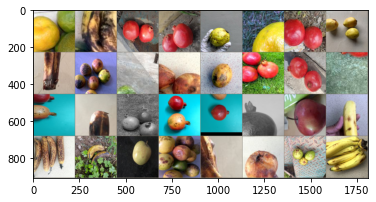

['Orange_Good', 'Banana_Bad', 'Pomegranate_Good', 'Pomegranate_Good', 'Guava_Bad', 'Orange_Good', 'Pomegranate_Good', 'Guava_Good', 'Banana_Bad', 'Lime_Bad', 'Guava_Good', 'Guava_Bad', 'Lime_Bad', 'Pomegranate_Good', 'Pomegranate_Good', 'Pomegranate_Good', 'Pomegranate_Good', 'Banana_Bad', 'Pomegranate_Good', 'Pomegranate_Good', 'Pomegranate_Good', 'Pomegranate_Good', 'Apple_Good', 'Banana_Good', 'Banana_Bad', 'Banana_Bad', 'Apple_Good', 'Lime_Bad', 'Banana_Bad', 'Guava_Bad', 'Guava_Good', 'Banana_Good']


In [46]:
# transform 된 배치 이미지 시각화
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # 갱신이 될 때까지 잠시 기다립니다.


# 학습 데이터의 배치를 얻습니다.
inputs, classes = next(iter(trainloader))

# 배치로부터 격자 형태의 이미지를 만듭니다.
out = torchvision.utils.make_grid(inputs)

imshow(out)
print([class_names[x] for x in classes])

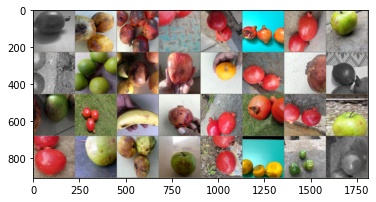

['Pomegranate_Good', 'Guava_Bad', 'Pomegranate_Bad', 'Pomegranate_Good', 'Pomegranate_Good', 'Pomegranate_Bad', 'Pomegranate_Good', 'Apple_Good', 'Pomegranate_Good', 'Lime_Good', 'Lime_Bad', 'Apple_Bad', 'Orange_Bad', 'Pomegranate_Good', 'Guava_Bad', 'Pomegranate_Good', 'Lime_Bad', 'Pomegranate_Good', 'Banana_Good', 'Pomegranate_Bad', 'Pomegranate_Good', 'Pomegranate_Good', 'Pomegranate_Good', 'Apple_Good', 'Pomegranate_Good', 'Apple_Good', 'Guava_Bad', 'Apple_Good', 'Pomegranate_Good', 'Orange_Bad', 'Guava_Good', 'Pomegranate_Good']


In [47]:

# 학습 데이터의 배치를 얻습니다.
inputs, classes = next(iter(valloader))

# 배치로부터 격자 형태의 이미지를 만듭니다.
out = torchvision.utils.make_grid(inputs)

imshow(out)
print([class_names[x] for x in classes])

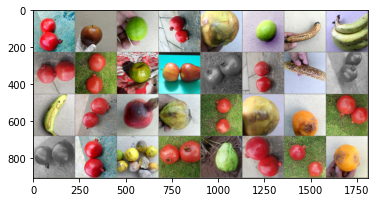

In [49]:

# 학습 데이터의 배치를 얻습니다.
inputs, classes = next(iter(testloader))

# 배치로부터 격자 형태의 이미지를 만듭니다.
out = torchvision.utils.make_grid(inputs)

imshow(out)
# print([class_names[x] for x in classes])

In [23]:
from tqdm import tqdm
# from sklearn.metrics import accuracy_score


def train_test_model(model, criterion, optimizer, scheduler, num_epochs):
    model = model.to(device)
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in tqdm(range(num_epochs)):
        
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)
        # print(f"time per 1 epoch: {time.time() - since:.2f}")

        # 각 에폭(epoch)은 학습 단계와 검증 단계를 갖습니다.
        for phase in ['train', 'test']:
            if phase == 'train':
              # pretrained 모델의 학습된 파라미터를 불러옴
                # model.load_state_dict(model_state_dict)
                model.train()  # 모델을 학습 모드로 설정
                running_loss = 0.0
                running_corrects = 0

                # 데이터를 반복
                for inputs, labels in trainloader:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # 매개변수 경사도를 0으로 설정
                    optimizer.zero_grad()

                    # 순전파
                    # 학습 시에만 연산 기록을 추적
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        train_loss = criterion(outputs, labels)

                    # 학습 단계인 경우 역전파 + 최적화
                    train_loss.backward()
                    optimizer.step()

                    # 통계
                    running_loss += train_loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)

                    scheduler.step()

                epoch_train_loss = running_loss / train_size
                epoch_train_acc = running_corrects.double() / train_size

                print(f'train Loss: {epoch_train_loss:.4f} Acc: {epoch_train_acc:.4f}')
                # wandb.log({'train_acc': epoch_acc, 'train_loss' : epoch_loss})

                for inputs, labels in valloader:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # 매개변수 경사도를 0으로 설정
                    optimizer.zero_grad()

                    # 순전파
                    # 학습 시에만 연산 기록을 추적
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        val_loss = criterion(outputs, labels)

                    # 학습 단계인 경우 역전파 + 최적화
                    val_loss.backward()
                    optimizer.step()

                    # 통계
                    running_loss += val_loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)

                    scheduler.step()

                epoch_val_loss = running_loss / val_size
                epoch_val_acc = running_corrects.double() / val_size

                print(f'val Loss: {epoch_val_loss:.4f} Acc: {epoch_val_acc:.4f}')
                # # wandb.log({'train_acc': epoch_acc, 'train_loss' : epoch_loss})

                if epoch_train_acc > best_acc:
                    best_acc = epoch_train_acc
                    best_model_wts = copy.deepcopy(model.state_dict())
                    
            
            else:
                # 코드 출처: https://blog.nerdfactory.ai/2020/11/04/Tutorial-2-for-Deep-Learning-Model-Trainer-Development.html
                # model.load_state_dict(torch.load(PATH))
                model.eval()   # 모델을 평가 모드로 설정
                sum_eval_acc, sum_eval_loss = 0, 0
                eval_result = {"mean_loss": 0, "mean_acc": 0}

                eval_iterator = tqdm(  # Description 양식 지정
                    testloader, desc='Evaluating - mean_loss: XXX, mean_acc: XXX'
                )

                # Evaluate
                for e_step, e_batch in enumerate(eval_iterator):
                    image_tensor, tags = map(lambda elm: elm.to(device), e_batch)  # device 에 연산용 텐서 할당
                    out = model(image_tensor)  # Calculate
                    loss = criterion(out, tags)

                    # Calculate acc & loss
                    sum_eval_acc += (out.max(dim=1)[1] == tags).float().mean().item()  # 정답과 추론 값이 일치하는 경우 정답으로 count
                    sum_eval_loss += loss.item()

                    eval_result.update({"mean_loss": sum_eval_acc / (e_step + 1),
                            "mean_acc": sum_eval_loss / (e_step + 1)})

                  # Step Description
                    eval_iterator.set_description(
                        'Evaluating - mean_loss: {:.3f}, mean_acc: {:.3f}'.format(
                            eval_result['mean_loss'], eval_result['mean_acc'])
                    )
   
        print()
        time.sleep(0.1)

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')
    print('Test result :', eval_result)
    # wandb.log({'test_acc': best_acc})
    

    # 가장 나은 모델 가중치를 불러옴
    model.load_state_dict(best_model_wts)
    return model

# def evaluate(model, criterion, eval_dataloader):
#     # Evaluation
#     model.eval()  # 모델의 AutoGradient 연산을 비활성화하고 평가 연산 모드로 설정 (메모리 사용 및 연산 효율화를 위해)
#     sum_eval_acc, sum_eval_loss = 0, 0
#     eval_result = {"mean_loss": 0, "mean_acc": 0}

#     eval_iterator = tqdm(  # Description 양식 지정
#         eval_dataloader, desc='Evaluating - mean_loss: XXX, mean_acc: XXX'
#     )

#     # Evaluate
#     for e_step, e_batch in enumerate(eval_iterator):
#         image_tensor, tags = map(lambda elm: elm.to(device), e_batch)  # device 에 연산용 텐서 할당
#         out = model(image_tensor)  # Calculate
#         loss = criterion(out, tags)

#         # Calculate acc & loss
#         sum_eval_acc += (out.max(dim=1)[1] == tags).float().mean().item()  # 정답과 추론 값이 일치하는 경우 정답으로 count
#         sum_eval_loss += loss.item()

#         # 평가 결과 업데이트
#         eval_result.update({"mean_loss": sum_eval_acc / (e_step + 1),
#                             "mean_acc": sum_eval_loss / (e_step + 1)})

#         # Step Description
#         eval_iterator.set_description(
#             'Evaluating - mean_loss: {:.3f}, mean_acc: {:.3f}'.format(
#                 eval_result['mean_loss'], eval_result['mean_acc'])
#         )
#     print(f'test Loss: {sum_eval_loss:.4f} Acc: {sum_eval_acc:.4f}')
#     # model.train()  # 평가 과정이 모두 종료 된 뒤, 다시 모델을 train 모드로 변경

#     return eval_result

In [24]:
import gc
# # from tqdm.notebook import trange, tqdm
gc.collect()
torch.cuda.empty_cache()

In [25]:
train_test_model(model, criterion, optimizer, exp_lr_scheduler,
                       num_epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch 0/19
----------
train Loss: 5.3342 Acc: 0.3143
val Loss: 26.6321 Acc: 1.5800



  0%|          | 0/20 [15:31<?, ?it/s]


RuntimeError: ignored